# Plot diagnostic track
Use the diagnostic_output_altimetry module to combine track observations input file and diagnostic track output files. Plot results on map. 

In [1]:
from fmdap import diagnostic_output_altimetry

In [2]:
doa = diagnostic_output_altimetry.DiagnosticOutputAltimetry()

In [3]:
file_mesh = '../tests/testdata/SW_local_DWF_MSL_coarse_v2.mesh'
file_diag = '../tests/testdata/Diagnostics_Altimetry_C2.dfs0'
file_obs = '../tests/testdata/RADS_North_Sea_rads_c2_Dutch_102017_all_params_20km-20171027-20171029.dfs0'
doa.read(file_diag, file_obs, obs_col_name='swh')

In [4]:
# Diagnostic output data 
doa.dfd.head()

,Longitude,Latitude,State 1Sign. Wave Height,State 2Sign. Wave Height,State 3Sign. Wave Height,State 4Sign. Wave Height,State 5Sign. Wave Height,State 6Sign. Wave Height,State 7Sign. Wave Height,Mean_State,Measurement,ModelTime
2017-10-27 12:50:00,2.422854,51.253353,0.270215,0.509852,0.336284,0.400406,0.271862,0.760079,0.055494,0.424483,1.638000,2017-10-27 12:50:00
2017-10-27 12:50:00,2.404706,51.367184,0.336716,0.557207,0.400530,0.443295,0.328404,0.808472,0.073816,0.470167,1.624667,2017-10-27 12:50:00
2017-10-27 12:50:00,2.386516,51.481014,0.358225,0.562302,0.411528,0.452109,0.347821,0.797502,0.081433,0.474679,1.800000,2017-10-27 12:50:00
2017-10-27 12:50:00,2.368265,51.594837,0.346750,0.550233,0.390775,0.440428,0.332866,0.789249,0.074255,0.464298,1.846000,2017-10-27 12:50:00
2017-10-27 12:50:00,2.340798,51.765572,0.321946,0.535287,0.360251,0.411837,0.300085,0.776280,0.063785,0.445249,1.839000,2017-10-27 12:50:00


In [5]:
# Original observation data, note that the 'swh' column has been renamed to 'track_observation'
doa.dfo.head()

,lon,lat,track_observation,ws,adt dhi,adt
2017-10-27 12:52:52,2.422854,51.253353,1.638,7.50,-0.5060,0.4956
2017-10-27 12:52:53,2.413789,51.310268,1.383,7.67,-0.4370,0.5204
2017-10-27 12:52:54,2.404711,51.367184,1.791,7.60,-0.4558,0.4527
2017-10-27 12:52:55,2.395619,51.424099,1.700,7.71,-0.4174,0.4391
2017-10-27 12:52:56,2.386516,51.481014,1.800,7.85,-0.4214,0.3807


## Remove observation data outside mesh

In [6]:
doa.read_mesh(file_mesh)
doa.remove_points_outside_mesh()

## Now match data from the two dataframes

In [7]:
doa.process()

Identified 0 individual passings
Will now identify DA points...
Identified 31 observation points used for DA
Will now match observation points from the two dataframes...
Found 31 matches
Will now create dfda dataframe...
Estimated offset: Median difference between obs and superobs, -0.0495002
Will now create QA dataframe dfqa...
Estimated offset: Median difference between obs and superobs, nan
DONE
C:\Users\JEM\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [8]:
doa.dfda.head()

,Longitude,Latitude,model_time,mean_f,std_f,mean_a,std_a,no_DA,obs,super_obs,track_id
2017-10-27 12:52:52,2.422854,51.253353,2017-10-27 12:50:00,0.424483,0.220702,1.10638,0.163534,NaN,1.5885,1.638,0
2017-10-27 12:52:53,2.413789,51.310268,NaN,NaN,NaN,NaN,NaN,NaN,1.3335,NaN,0
2017-10-27 12:52:54,2.404711,51.367184,2017-10-27 12:50:00,0.470167,0.225764,1.168557,0.168902,NaN,1.7415,1.624667,0
2017-10-27 12:52:55,2.395619,51.424099,NaN,NaN,NaN,NaN,NaN,NaN,1.6505,NaN,0
2017-10-27 12:52:56,2.386516,51.481014,2017-10-27 12:50:00,0.474679,0.21863,1.149768,0.164576,NaN,1.7505,1.8,0


## Tracks can be plotted with or without map

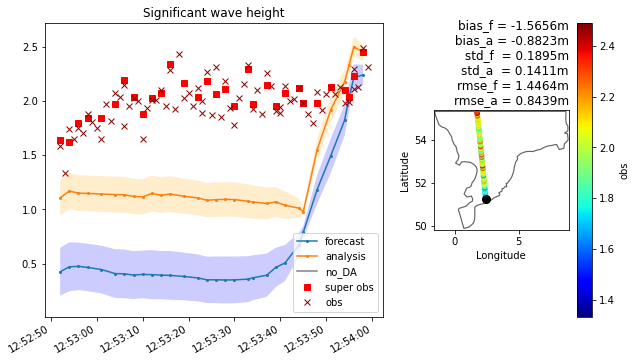

In [9]:
doa.plot_track_with_map(track_id=0, figsize=(10,6), title='Significant wave height');